# Sales Analysis Using Online Electronic Store Data
## ----------------------------------------------------------------------------

In [2]:
import os
import pandas as pd

## 1) Import the data

In [5]:
files = [file for file in os.listdir('./Sales_Data') if not file.startswith('.')]
files

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [8]:
data = pd.DataFrame()

for file in files:
    temp = pd.read_csv('./Sales_Data/' + file)
    data = pd.concat([data, temp])
    
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [9]:
data.shape

(186850, 6)

In [10]:
data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

## 2) Clean the Data
##### a) Drop NaN values from the data

In [11]:
data[data.isna().any(axis=1)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
10012,NaN,NaN,NaN,NaN,NaN,NaN
10274,NaN,NaN,NaN,NaN,NaN,NaN
10878,NaN,NaN,NaN,NaN,NaN,NaN
11384,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
data = data.dropna(how='all')
data.shape

(186305, 6)

##### b) Clean tuples with column names as their entry

In [17]:
data = data[data['Order Date'] != 'Order Date']

##### c) Convert the columns to the correct data type

In [20]:
data['Quantity Ordered'] = pd.to_numeric(data['Quantity Ordered'])
data['Price Each'] = pd.to_numeric(data['Quantity Ordered'])

## 3) Augmentation of the data 
##### a) Add a month column with the numeric value of the month

In [19]:
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Month'] = data['Order Date'].dt.month
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4


##### b) Add a city column with state notation

In [34]:

def getCity(address):
    return address.split(',')[1]

def getState(address):
    return address.split(',')[2].split(' ')[1]

data['City'] = data['Purchase Address'].apply(lambda x: getCity(x) + ' (' + getState(x) + ')')
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,2,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,4,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,1,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,1,Boston (MA)
3,176560,Google Phone,1,1,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,1,Los Angeles (CA)
4,176560,Wired Headphones,1,1,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,1,Los Angeles (CA)
5,176561,Wired Headphones,1,1,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,1,Los Angeles (CA)
...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,3,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,9,Los Angeles (CA)
11682,259354,iPhone,1,1,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,1,San Francisco (CA)
11683,259355,iPhone,1,1,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,1,San Francisco (CA)
11684,259356,34in Ultrawide Monitor,1,1,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,1,San Francisco (CA)


##### c) Add hours column

In [40]:
data['Hour'] = data['Order Date'].dt.hour
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,176558,USB-C Charging Cable,2,2,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,4,Dallas (TX),8
2,176559,Bose SoundSport Headphones,1,1,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,1,Boston (MA),22
3,176560,Google Phone,1,1,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,1,Los Angeles (CA),14
4,176560,Wired Headphones,1,1,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,1,Los Angeles (CA),14
5,176561,Wired Headphones,1,1,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,1,Los Angeles (CA),9


## 4) Explore the data!!
#### Qa) Find out the best month for sales and the total amount earned that month.

In [23]:
data['Sales'] = data['Quantity Ordered'] * data['Price Each']

In [28]:
resulta = data.groupby('Month')['Sales'].sum()
resulta

Month
1     14151
2     17331
3     22033
4     26604
5     24361
6     19667
7     21108
8     17538
9     16985
10    29287
11    25888
12    36590
Name: Sales, dtype: int64

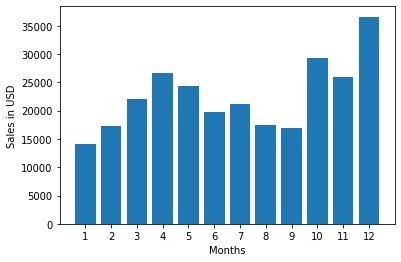

In [32]:
import matplotlib.pyplot as plt

months = data['Month'].unique()
months.sort()

plt.bar(months, resulta)
plt.xticks(months)
plt.xlabel('Months')
plt.ylabel('Sales in USD')
plt.show()

##### Qb) Find out the city which sold the most number of products.

In [36]:
resultb = data.groupby('City')['Sales'].sum()
resultb

City
 Atlanta (GA)          21184
 Austin (TX)           14469
 Boston (MA)           29600
 Dallas (TX)           21964
 Los Angeles (CA)      43241
 New York City (NY)    36106
 Portland (ME)          3500
 Portland (OR)         14849
 San Francisco (CA)    65223
 Seattle (WA)          21407
Name: Sales, dtype: int64

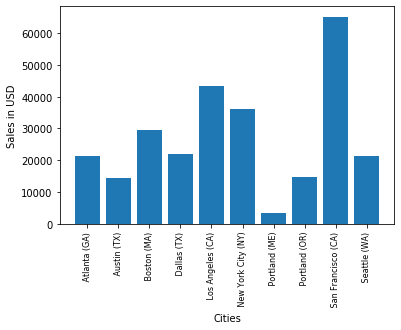

In [39]:
cities = data['City'].unique()
cities.sort()

plt.bar(cities, resultb)
plt.xticks(cities, rotation='vertical', size=8)
plt.xlabel('Cities')
plt.ylabel('Sales in USD')
plt.show()

##### Qc) Find out the best time to display advertisements for maximum customer engagement.

In [41]:
resultc = data.groupby('Hour').count()
resultc

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
Hour,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256


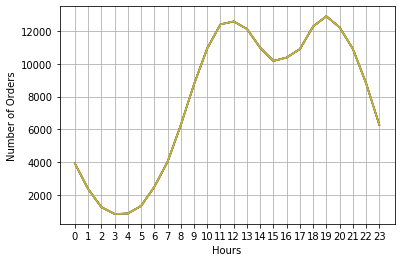

In [44]:
hours = data['Hour'].unique()
hours.sort()

plt.plot(hours, resultc)
plt.xticks(hours)
plt.xlabel('Hours')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()

##### Qd) Find the pair of products that are often sold together.

In [51]:
resultd = data[data['Order ID'].duplicated(keep=False)]
resultd['Grouped'] = resultd.groupby('Order ID')['Product'].transform(lambda x: (', ').join(x))
resultd = resultd[['Order ID', 'Grouped']].drop_duplicates()
resultd

C:\Users\yumin\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Order ID,Grouped
3,176560,"Google Phone, Wired Headphones"
18,176574,"Google Phone, USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones, Bose SoundSport He..."
32,176586,"AAA Batteries (4-pack), Google Phone"
119,176672,"Lightning Charging Cable, USB-C Charging Cable"
...,...,...
11617,259296,"Apple Airpods Headphones, Apple Airpods Headph..."
11619,259297,"iPhone, Lightning Charging Cable, Lightning Ch..."
11627,259303,"34in Ultrawide Monitor, AA Batteries (4-pack)"
11639,259314,"Wired Headphones, AAA Batteries (4-pack)"


In [54]:
from itertools import combinations
from collections import Counter

count = Counter()

for products in resultd['Grouped']:
    product_list = products.split(', ')
    count.update(Counter(combinations(product_list, 2)))

count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]